In [1]:
import pandas as pd
import os

In [17]:
anno_df = pd.read_csv('state_videos/label_fry_test.csv')

In [18]:
imgroot_name = 'state_videos/fry/images/fry_images/'
names = []
labels = []
for i in range(len(anno_df)):
    row = anno_df.iloc[i]
    video_name = row['video']
    start_frame = row['0']
    change_begin_frame = row['1']
    change_end_frame = row['2']
    end_frame = row['3']
    folder_name = imgroot_name + video_name
    img_list = [f for f in os.listdir(folder_name) if f.endswith('.jpg')]
    for img in img_list:
        img_idx = int(img.split('.')[0].split('_')[-1])
        if start_frame <= img_idx < change_begin_frame:
            label = 0
        elif change_begin_frame <= img_idx < change_end_frame:
            label = 1
        elif change_end_frame <= img_idx <= end_frame:
            label = 2
        else:
            label = 3
        names.append(img)
        labels.append(label)
list_of_tuples = list(zip(names,labels))
write_df = pd.DataFrame(list_of_tuples, columns = ['name', 'label'])

In [19]:
write_df.to_csv('fry_test_labels_ba.csv')

In [25]:
l = [('888_99_1',0),('888_99_7',2),('888_99_26',1), ('888_99_27',1),('888_99_28',1),('888_99_119',1)]

In [27]:
l.sort(key=lambda k:int(k[0].split('_')[-1]))

In [20]:
l

[('888_99_1', 0),
 ('888_99_7', 2),
 ('888_99_26', 1),
 ('888_99_27', 1),
 ('888_99_28', 1),
 ('888_99_119', 2)]

In [28]:
in_b = False
in_c = False
s0 = l[0][1]
if s0 == 0:
    in_b = True
elif s0 == 1:
    in_c = True
    
t_bc = -1
t_ca = -1
sl = s0

count = 0
for item in l:
    t = int(item[0].split('_')[-1])
    s = item[1]
    print('{}_{}_{}'.format(s,sl,count))
    if s == sl + 1:
        if s == 1 and in_b:
            count += 1
            if count == 3:
                t_bc = t - 2
                in_b = False
                in_c = True
                sl = s
                count = 0
        elif s == 2 and in_c:
            count += 1
            if count == 3:
                t_ca = t - 2
                in_c = False
                sl = s
                count = 0
    else:
        count = 0
        
print(t_bc)   
print(t_ca) 

0_0_0
2_0_0
1_0_0
1_0_1
1_0_2
1_1_0
26
-1


In [2]:
a = [(24,206),(1,171),(31,148),(33,128),(35,121),(13,119),(16,169),
     (12,189),(22,62),(1,65),(5,105),(1,8),(105,200),(26,141),(1,231),(1,80),(1,44),
    (26,120),(6,57),(38,113),(1,64),(4,92),(163,302),(2,273)]

p = [(28,206),(1,171),(33,110),(68,128),(1,121),(12,119),(16,213),(10,134),(1,62),(1,104),(1,151),(1,14),(102,196),(53,132),
    (1,231),(1,37),(1,70),(25,122),(6,57),(54,87),(1,60),(1,98),(162,302),(14,112)]

r = [(110,164),(100,150),(85,143),(80,120),(60,90),(78,117),(117,176),
     (116,174),(31,46),(71,106),(75,113),(25,38),(128,191),(93,140),(115,173),(62,93),(42,62),
    (68,102),(28,43),(72,108),(60,90),(69,104),(164,246),(159,239)]
l = [219,200,190,159,121,155,234,232,62,141,151,50,255,185,231,124,83,136,57,144,120,138,328,318]

In [5]:
e = 0
for i in range(len(a)):
    e += ((a[i][0] - r[i][0])**2 + (a[i][1] - r[i][1])**2) / l[i]

In [6]:
e / 24

29.775386905867947

In [29]:
318 * 3/4

238.5

In [9]:
f1 = 0.7063
rec = 0.6784
pre = 1 / (2/f1 - 1/rec)
pre

0.7365932667179094

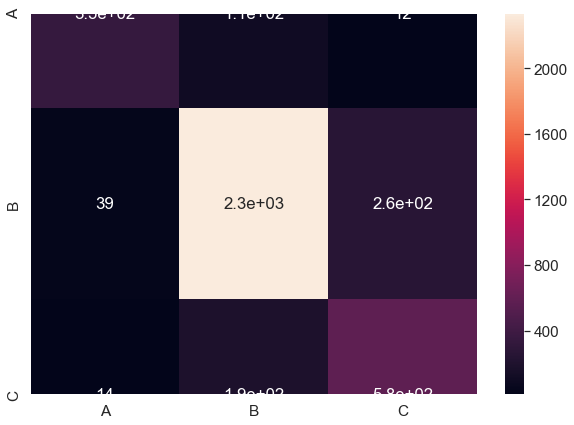

In [6]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = [[346,110,12],
         [39,2331,261],
         [14,192,576]]
df_cm = pd.DataFrame(array, index = [i for i in "ABC"],
                  columns = [i for i in "ABC"])
fig = plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
fig.savefig('temp.png', dpi=fig.dpi)